In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [2]:
df = pd.read_csv('/Users/nuriagarciaarias/Downloads/amz_uk_price_prediction_dataset.csv')


In [4]:
category_counts = df['category'].value_counts()
category_counts

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

1. Frequency Tables:

* Generate a frequency table for the product category.
Which are the top 5 most listed product categories?


In [5]:
top_5_categories = category_counts.head(5)
print("Top 5 categorías más listadas:")
print(top_5_categories)

Top 5 categorías más listadas:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


2. Visualizations:
* Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

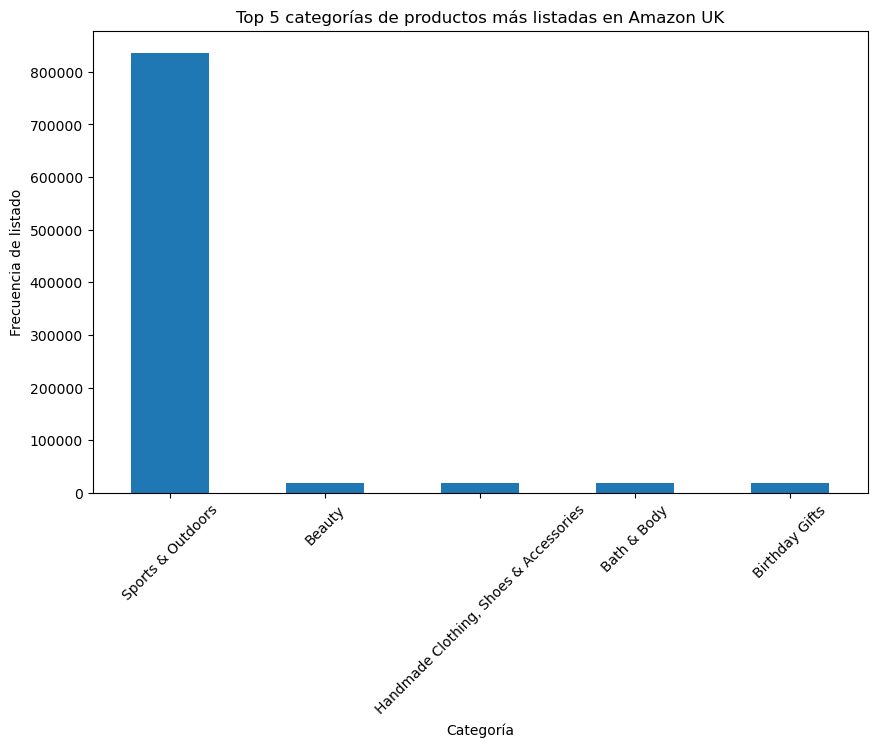

In [8]:
top_5_categories = category_counts.head(5)
plt.figure(figsize=(10, 6))
top_5_categories.plot(kind='bar')
plt.title('Top 5 categorías de productos más listadas en Amazon UK')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia de listado')
plt.xticks(rotation=45)
plt.show()

* For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

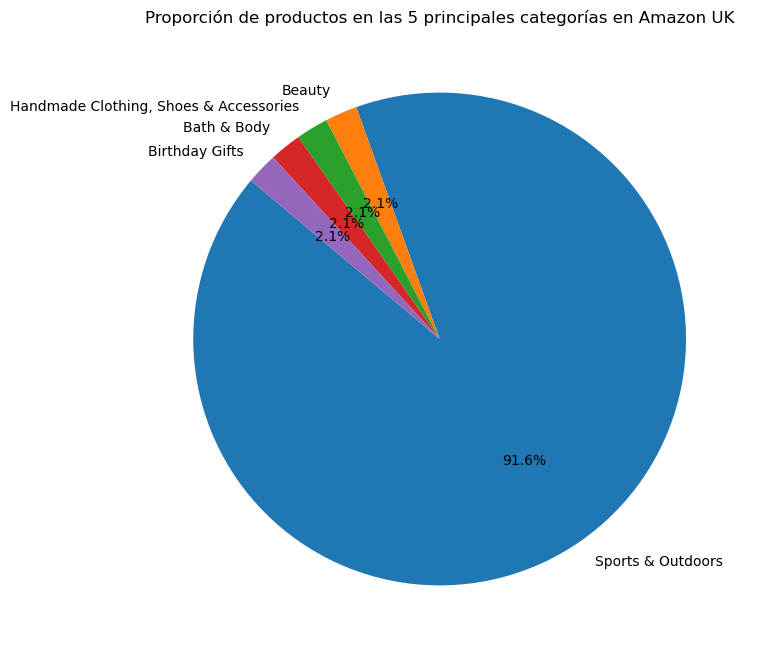

In [9]:
plt.figure(figsize=(8, 8))
top_5_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proporción de productos en las 5 principales categorías en Amazon UK')
plt.ylabel('')
plt.show()

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. Measures of Centrality:

* Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [10]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

In [12]:
print(f"La media es: {mean_price:.2f}")
print(f"La mediana es: {median_price:.2f}")
print(f"La moda es: {mode_price:.2f}")

# Comparación de resultados
print(f"La diferencia entre la media y la moda es: {mean_price - mode_price:.2f}")
print(f"La diferencia entre la mediana y la moda es: {median_price - mode_price:.2f}")


La media es: 89.24
La mediana es: 19.09
La moda es: 9.99
La diferencia entre la media y la moda es: 79.25
La diferencia entre la mediana y la moda es: 9.10


2. Measures of Dispersion:
* Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [13]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f"La varianza es: {variance_price:.2f}")
print(f"La desviación estándar es: {std_dev_price:.2f}")
print(f"El rango del precio de los productos es: {range_price:.2f}")
print(f"El rango intercuartil (IQR) del precio de los productos es: {iqr_price:.2f}")

# Comparar los resultados
print("Medidas de dispersión del precio de los productos:")
print(f"Varianza: {variance_price:.2f}")
print(f"Desviación estándar: {std_dev_price:.2f}")
print(f"Rango: {range_price:.2f}")
print(f"Rango intercuartil (IQR): {iqr_price:.2f}")

La varianza es: 119445.49
La desviación estándar es: 345.61
El rango del precio de los productos es: 100000.00
El rango intercuartil (IQR) del precio de los productos es: 36.00
Medidas de dispersión del precio de los productos:
Varianza: 119445.49
Desviación estándar: 345.61
Rango: 100000.00
Rango intercuartil (IQR): 36.00


3. Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.

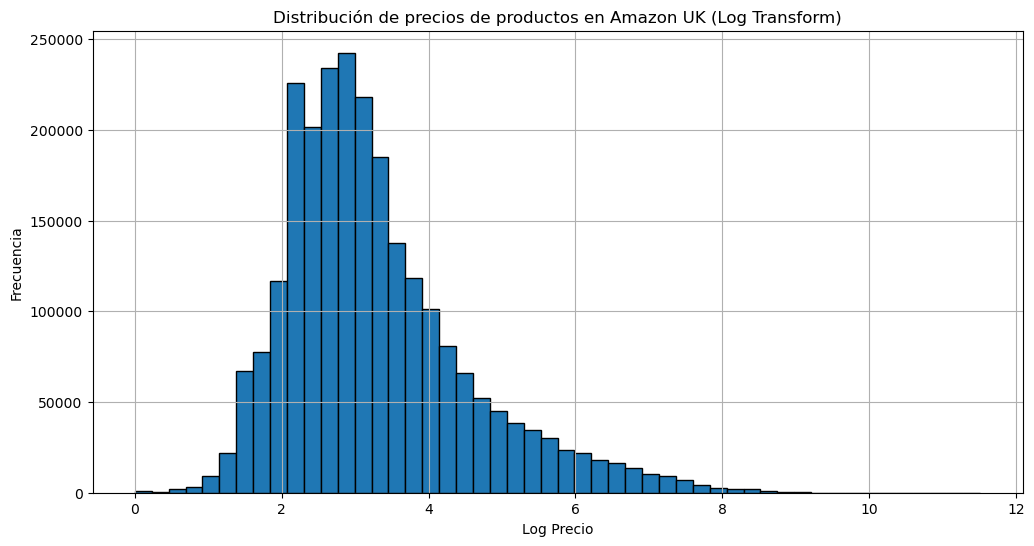

In [17]:

plt.figure(figsize=(12, 6))
plt.hist(np.log(df['price'] + 1), bins=50, edgecolor='k')  # Aplicamos logaritmo a los precios
plt.title('Distribución de precios de productos en Amazon UK (Log Transform)')
plt.xlabel('Log Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

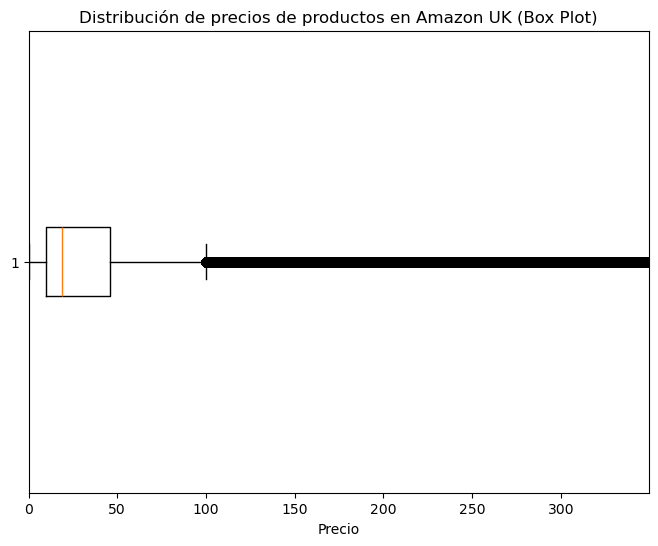

In [18]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False)
plt.xlim([0, df['price'].quantile(0.95)])  # Enfocarse en el 95% de los datos
plt.title('Distribución de precios de productos en Amazon UK (Box Plot)')
plt.xlabel('Precio')
plt.show()

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?


In [21]:
df.head (10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [23]:
mean_reviews = df['reviews'].mean()
median_reviews = df['reviews'].median()
mode_reviews = df['reviews'].mode()[0]

print(f"La media es: {mean_reviews:.2f}")
print(f"La mediana es: {median_reviews:.2f}")
print(f"La moda es: {mode_reviews:.2f}")

# Comparar los resultados
print(f"La diferencia entre la media y la moda es: {mean_reviews - mode_reviews:.2f}")
print(f"La diferencia entre la mediana y la moda es: {median_reviews - mode_reviews:.2f}")

La media es: 480.63
La mediana es: 0.00
La moda es: 0.00
La diferencia entre la media y la moda es: 480.63
La diferencia entre la mediana y la moda es: 0.00



2. Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution

In [24]:
variance_reviews = df['reviews'].var()
std_dev_reviews = df['reviews'].std()
iqr_reviews = df['reviews'].quantile(0.75) - df['reviews'].quantile(0.25)

print(f"La varianza es: {variance_reviews:.2f}")
print(f"La desviación estándar es: {std_dev_reviews:.2f}")
print(f"El rango intercuartil (IQR) de las calificaciones de los productos es: {iqr_reviews:.2f}")


La varianza es: 35332611.92
La desviación estándar es: 5944.12
El rango intercuartil (IQR) de las calificaciones de los productos es: 59.00


Shape of the Distribution:
Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [27]:
skewness_reviews = skew(df['reviews'].dropna())
kurtosis_reviews = kurtosis(df['reviews'].dropna())

print(f"La asimetría (skewness) de las calificaciones de los productos es: {skewness_reviews:.2f}")
print(f"La curtosis (kurtosis) de las calificaciones de los productos es: {kurtosis_reviews:.2f}")


La asimetría (skewness) de las calificaciones de los productos es: 102.82
La curtosis (kurtosis) de las calificaciones de los productos es: 17740.98


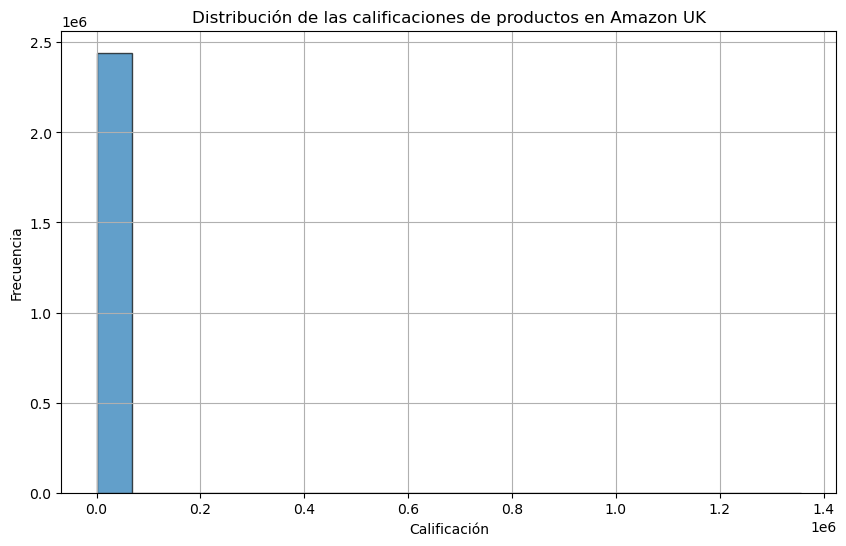

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['reviews'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de las calificaciones de productos en Amazon UK')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

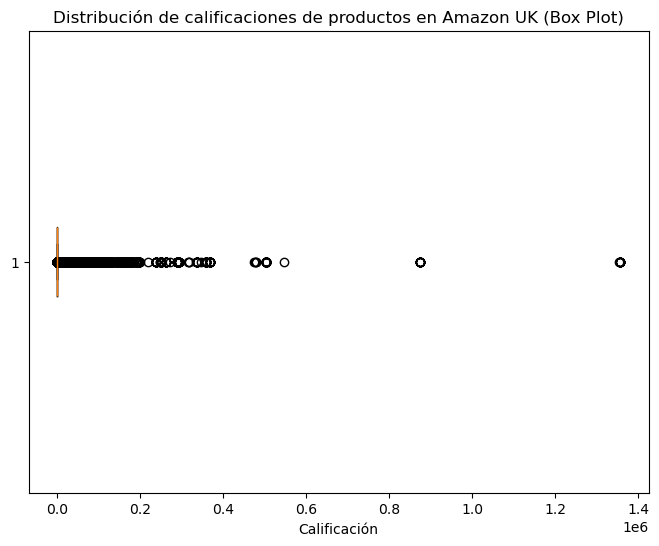

In [29]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['reviews'], vert=False)
plt.title('Distribución de calificaciones de productos en Amazon UK (Box Plot)')
plt.xlabel('Calificación')
plt.show()

4. Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

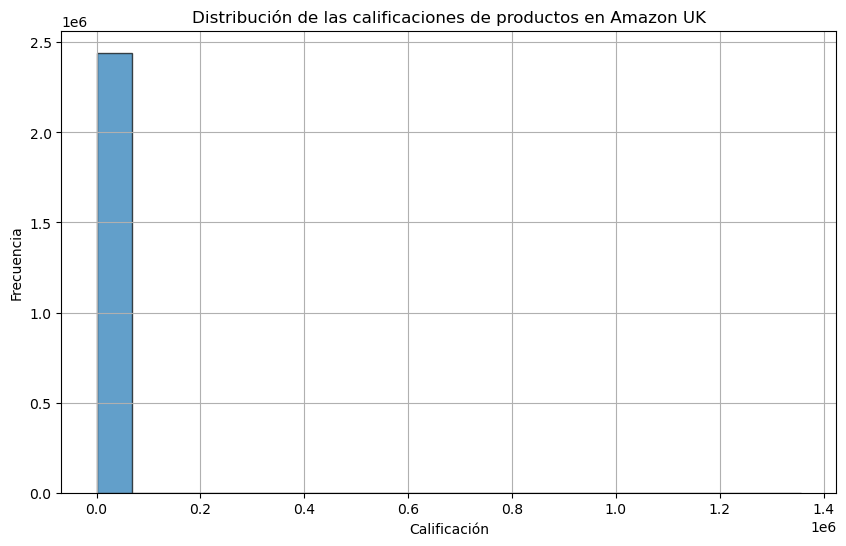

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df['reviews'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de las calificaciones de productos en Amazon UK')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()